# Interaction with the World Homework (#3)
Python Computing for Data Science (c) J Bloom, UC Berkeley, 2016

# 1) Monty: The Python Siri

Let's make a Siri-like program with the following properties:
   - record your voice command
   - use a webservice to parse that sound file into text
   - based on what the text, take three different types of actions:
       - send an email to yourself
       - do some math
       - tell a joke

So for example, if you say "Monty: email me with subject hello and body goodbye", it will email you with the appropriate subject and body. If you say "Monty: tell me a joke" then it will go to the web and find a joke and print it for you. If you say, "Monty: calculate two times three" it should response with printing the number 6.

Hint: you can use speed-to-text apps like Houndify to return the text (but not do the actions). You'll need to sign up for a free API and then follow documentation instructions for using the service within Python. 

In [266]:
#
# Module to parse sound file into text, must have speech_recognition module installed 
# If not installed, do 'pip install speech_recognition'
#

import speech_recognition as sr

#
# Modules to send an e-mail
#

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

#
# Module to tell a joke
# If not installed, do 'pip install pyjokes'
#

from bs4 import BeautifulSoup
from lxml import html
import requests

from random import randint

In [291]:

#Leverage speech recognition module to parse sound file into text


r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

text = r.recognize_google(audio)
print(text)

Say something!
Monty add 1 + 2


In [292]:
#
# Split my string of text commands into discrete words
#

words = text.split(' ')

#
# Based on the split words, determine what action the program should take
# Whenever you ask the code to 
#

email_input = ['email', 'message', 'emails', 'send']
joke_input = ['joke', 'laugh', 'tell', 'give']
math_input = ['operator', 'add', 'divide', 'subtract', 'multiply', 'number', 'integer', 'calculate']

if words[1] in email_input:
    
    fromaddr = "sarafinanance008@gmail.com"
    toaddr = "sarafinanance008@gmail.com"
    msg = MIMEMultipart()
    msg['From'] = fromaddr
    msg['To'] = toaddr
    
    for i in range(len(words)):
        if words[i] == 'subject':
            subj_element = words[5]
        if words[i] == 'body':
            body_element = words[8:]
            body_full = ' '.join(body_element)
        
    msg['Subject'] = subj_element

    body = body_full
            
    msg.attach(MIMEText(body, 'plain'))

    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(fromaddr, "fiffles123*")
    text = msg.as_string()
    server.sendmail(fromaddr, toaddr, text)
    server.quit()
    
elif words[1] in joke_input:

    page = requests.get('http://pun.me/pages/dad-jokes.php')
    soup = BeautifulSoup(page.text,"html.parser")
    joke = soup.find(class_ = "content").get_text()
    joke_split = joke.split("\n")

    jokes = jokes[:43]

    for i in range(len(jokes)):
        joke = jokes[i]
        joke = joke.replace("\t\t", "")
        joke = joke.replace("\tA", "")
        joke = joke.replace("(adsbygoogle = window.adsbygoogle || []).push({});", "")
        jokes[i] = joke

    jokes = [x for x in jokes if x != '']
    jokes = jokes[1:]

    def validate_array(arr, q, a):
      if (len(arr) > 1) and (arr[0] != '' and arr[1] != ''):
        q.append(arr[0])
        a.append(arr[1])
      return [q, a]

    def split_joke_and_validate_array(delimeters, joke, q, a):
      for delimeter in delimeters:
        arr = joke.split(delimeter)
        qa = validate_array(arr, q, a)
        q = qa[0]
        a = qa[1]

      return [q, a]

    q = []
    a = []

    for x in range(len(jokes)):
      delimeters = ['? ', '.']
      joke = jokes[x]
      qa = split_joke_and_validate_array(delimeters, joke, q, a)
      q = qa[0]
      a = qa[1]

    random_number = randint(0, len(q)-1)

    print(q[random_number])
    time.sleep(2)
    print("...")
    time.sleep(1)
    print("...")
    time.sleep(1)
    print("...")
    time.sleep(1)
    print(a[random_number])

elif words[1] in math_input:
    operation_elements = words[2:]
    operation = ' '.join(operation_elements)
    solution = eval(operation)
    print(solution)

3


# 2) Write a program that identifies musical notes from sound (AIFF) files. 

  - Run it on the supplied sound files (12) and report your program’s results. 
  - Use the labeled sounds (4) to make sure it works correctly. The provided sound files contain 1-3 simultaneous notes from different organs.
  - Save copies of any example plots to illustrate how your program works.
  
  https://piazza.com/berkeley/fall2016/ay250/resources -> hw3_sound_files.zip

Hints: You’ll want to decompose the sound into a frequency power spectrum. Use a Fast Fourier Transform. Be care about “unpacking” the string hexcode into python data structures. The sound files use 32 bit data. Play around with what happens when you convert the string data to other integer sizes, or signed vs unsigned integers. Also, beware of harmonics.

In [42]:
#
#Import relevant modules
#

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import aifc
from numpy.fft import fft
import pandas as pd
% matplotlib inline

In [102]:
#
# Define a FFT function that takes the AIFF files and performs an FFT on them
#

def fft(file):
    audio = aifc.open(file)
    nframe = audio.getnframes()
    readframe = audio.readframes(nframe)
    
    # swap the bytes of the array elements
    bytes_swap = np.fromstring(readframe, np.short).byteswap()
    
    fft_audio = abs(np.fft.rfft(bytes_swap))
    fft_audio = fft_audio[0:100000]
    return fft_audio


#
# As in class, plot the frequency power spectrum from the FFT to derive the peak frequency
#

def plot_fft(music):
    fig = plt.figure(figsize=(7, 4.5))
    plt.plot(music, color = 'blue', linestyle = '-')
    plt.xlabel('Frequency (cHz)')
    plt.ylabel('Amplitude')

#
# Derive the peak freqency from my plot
#

def peak_freq(arr, span = 400):
    new_arr = np.zeros(len(arr)/span)
    front = 0
    back = span
    for i in range(len(new_arr)):
        sliced = arr[front:back]
        if sliced[int(np.argmax(sliced))] > 1e8:
            new_arr[i] = np.argmax(sliced) + front
        front += span
        back += span
    new_arr = new_arr[new_arr != 0.0]
    return new_arr

#
# Remove the harmonics 
#

def without_harmonics(arr):
    for i in range(len(arr)):
        for j in range(len(arr)):
            for k in range(2,10):
                if arr[j] > k*arr[i] - 25 and arr[j] < k*arr[i] + 25:
                    arr[j] = 0.0
    improved_maxes = arr[arr != 0.0]
    print(improved_maxes)
    return improved_maxes

#
# Provide a reference to register and name frequencies
# 

notes = pd.read_csv('named_notes.dms', sep='\t')
freq = np.array(notes['Frequency (Hz)'])*100/(2*np.pi)
note = np.array(notes['Note'])

#
# Define a function to classify relevant peaks
#

def peak_class(frequencies, maximum = 30):
    for i in range(len(frequencies)):
        good_frequencies = abs(freq - frequencies[i]) 
        if min(good_frequencies) < maximum:
            minimum = np.argmin(good_frequencies)
            min_note = note[minimum]
            print(min_note)

#        
# function that ties it all together
#

def detect_notes(file, span = 400, maximum = 30):
    print('File:')
    print(file)
    power_spectrum = fft(file)
    plot_fft(power_spectrum)
    maxes_sorted = peak_freq(power_spectrum, span)
    maxes_trimmed = without_harmonics(maxes_sorted)
    print('This file contains:')
    peak_class(maxes_trimmed, maximum = 30)

File:
sound_files/F4_CathedralOrgan.aif
[  5586.  33477.  56301.  89372.]
This file contains:
F4


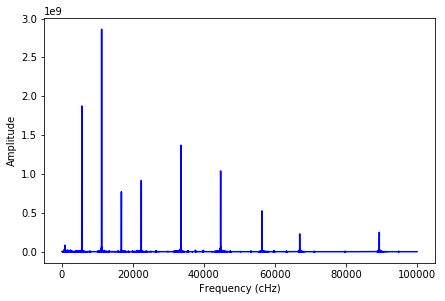

In [60]:
detect_notes('sound_files/F4_CathedralOrgan.aif')

File:
sound_files/1.aif
[  4185.   4687.   6260.   8413.  18820.  28161.]
This file contains:
C4
D4
G4
File:
sound_files/2.aif
[  2793.   2815.   8413.  33415.  44759.]
This file contains:
F3
File:
sound_files/4.aif
[  4185.  25079.  42178.  66954.]
This file contains:
C4
File:
sound_files/5.aif
[ 1567.  2349.  7890.]
This file contains:
G2
D3
B4
File:
sound_files/8.aif
[  5576.   5608.  11191.  16770.  33415.]
This file contains:
F4
File:
sound_files/9.aif
[  3135.  37629.  50086.]
This file contains:
G3
File:
sound_files/10.aif
[  1046.  10564.  12521.  16770.]
This file contains:
C2
File:
sound_files/11.aif
[  1318.  15830.  21089.]
This file contains:
E2
File:
sound_files/12.aif
[   799.   1046.  10545.  12540.  16739.]
This file contains:
G1
C2


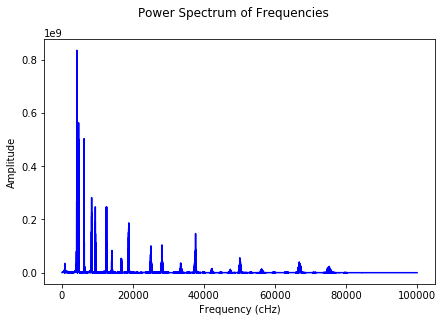

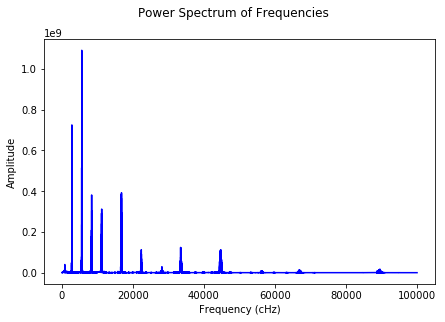

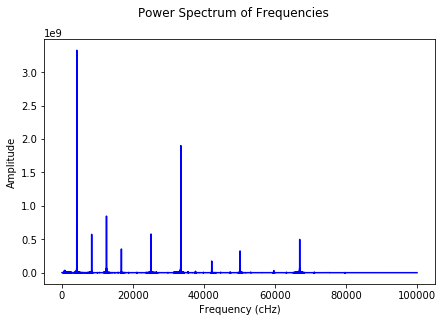

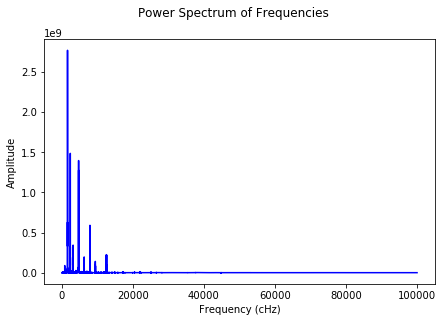

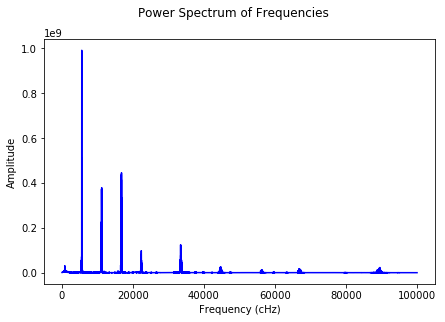

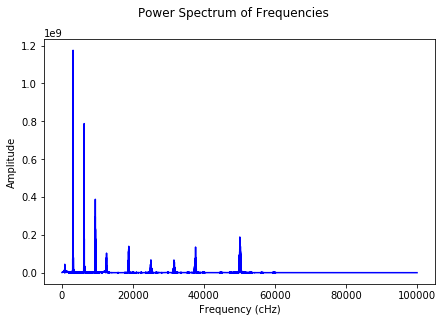

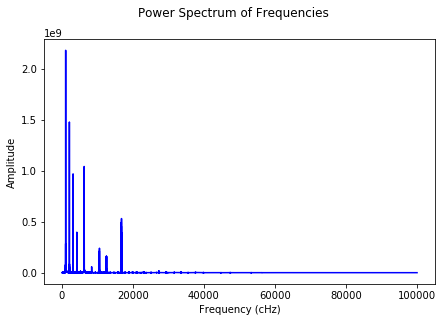

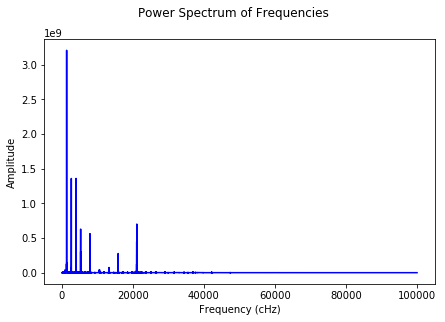

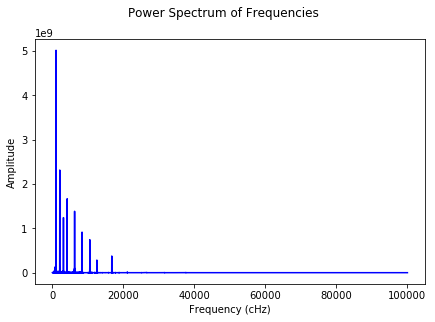

In [57]:
#
# Plot and extract frequencies for all files except 3, 6, and 7
#

for i in range(1,13):
    if i == 3 or i == 6 or i == 7: 
        continue
    detect_notes(file='sound_files/'+str(i)+'.aif')
    



File:
sound_files/3.aif
[  6940.   6973.   7038.   7135.  20573.  20631.  20674.  20706.  20738.
  20951.  21025.  21057.  21089.  21185.  21217.  21281.  21313.  21345.
  21441.  21473.  21505.  21547.  21600.  21664.  21696.  21728.]
This file contains:
A4


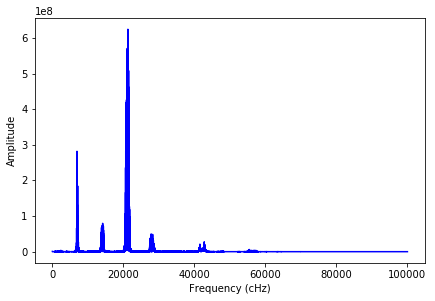

In [77]:
detect_notes('sound_files/3.aif', span = 43)

File:
sound_files/6.aif
[  8369.  25079.  84356.]
This file contains:


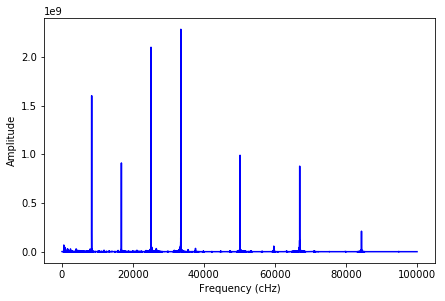

In [113]:
detect_notes('sound_files/6.aif', span = 100, maximum = 100)